# 计算寻路小游戏各状态 Value Function

1. 红色各自初始位置
2. 黑色点获得奖励-10
3. 黄色点获得奖励100
4. 每个状态的向4各方向的转移概率相同，假设不会撞墙

![title](https://github.com/xx529/Reinforcement-Learning/blob/main/Policy%20Iteration%20%26%20Value%20Iteration/WechatIMG1201.png?raw=1)
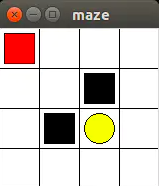

In [ ]:
import numpy as np

In [ ]:
# 状态转移矩阵
S = np.array([
       [0, 1/2, 0., 0., 0., 1/2, 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], #1
       [1/3, 0, 1/3, 0., 0., 1/3, 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], #2
       [0., 1/3, 0, 1/3, 0., 0., 1/3, 0., 0., 0., 0., 0., 0., 0., 0., 0.], #3
       [0., 0., 1/2, 0, 0., 0., 0., 1/2, 0., 0., 0., 0., 0., 0., 0., 0.], #4
       [1/3, 0., 0., 0., 0, 1/3, 0., 0., 1/3, 0., 0., 0., 0., 0., 0., 0.], #5
       [0., 1/4, 0., 0., 1/4, 0., 1/4, 0., 0., 1/4, 0., 0., 0., 0., 0., 0.], #6
       [0., 0., 0., 0., 0., 0., 1, 0., 0., 0., 0., 0., 0., 0., 0., 0.], ##7 
       [0., 0., 0., 1/3, 0., 0., 1/3, 0, 0., 0., 0., 1/3, 0., 0., 0., 0.], #8
       [0., 0., 0., 0., 1/3, 0., 0., 0., 0, 1/3, 0., 0., 1/3, 0., 0., 0.], #9
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1, 0., 0., 0., 0., 0., 0.], ##10
       [0., 0., 0., 0., 0., 0., 1/4, 0., 0., 1/4, 0., 1/4, 0., 0., 1/4, 0.], #11
       [0., 0., 0., 0., 0., 0., 0., 1/3, 0., 0., 1/3, 0, 0., 0., 0., 1/3], #12
       [0., 0., 0., 0., 0., 0., 0., 0., 1/2, 0., 0., 0., 0, 1/2, 0., 0.], #13
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1/3, 0., 0., 1/3, 0, 1/3, 0.], #14
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1/3, 0., 0., 1/3, 0, 1/3], #15
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1/2, 0., 0., 1/2, 0], #16
])


# 状态奖励
R = np.array([-1, -1, -1, -1, -1, -1, -10, -1, -1, -10, 100, -1, -1, -1, -1, -1])

# 衰减因子
gamma = 0.8

# 阈值更新
threshold = 0.0001

# 迭代计算
V_init = np.ones(16)
V = np.zeros(16)

while abs((V_init - V).sum()) > threshold:
    V = V_init
    V_init = R + gamma * np.dot(V, S.T)
    
np.round(V, 2).reshape(4,4)

array([[-21.07, -20.83, -23.97, -15.3 ],
       [-20.83, -29.33, -50.  , -11.77],
       [-23.97, -50.  ,  89.96,  24.89],
       [-15.3 , -11.77,  24.89,  18.91]])

# 策略迭代与价值迭代

1. 红色为起始点
2. 黑色为惩罚点，获得-10奖励
3. 黄色为目标点，获得100的奖励
4. 撞墙的状态奖励设置为-5，撞墙状态所有action回到自身
5. 每个状态均有上下左右4种action
    1. 边缘状态遇到撞墙action则回到自己状态
    2. 黄色，黑色点只有所有action均回到自身
    3. 其他点对应4个action均到达相应指向的状态 $p(s^{\prime}|a)=1$


![title](https://github.com/xx529/Reinforcement-Learning/blob/main/Policy%20Iteration%20%26%20Value%20Iteration/WX20201126-003224.png?raw=1)

## 定义变量

In [ ]:
# envirement
S = np.arange(0, 17)
S

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [ ]:
# 每个 state 的状态价值初始化
V = np.zeros(17)
V

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
# 每个 state 的 reward
R = np.zeros(17)
R[0] = -5
R[[7, 10]] = -10
R[11] = 100
R

array([ -5.,   0.,   0.,   0.,   0.,   0.,   0., -10.,   0.,   0., -10.,
       100.,   0.,   0.,   0.,   0.,   0.])

In [ ]:
# 每个 state 的 policy，横 -> 上下左右，纵 -> state，值 -> acion 对应的概率，均等初始化
P = np.ones(shape=(17, 4)) / 4
P

array([[0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25]])

In [ ]:
# 每个 state 的 action(上下左右) 对应的下一个 state 的
A = np.array([
       [0, 0, 0, 0], # 0
       [0, 5, 1, 2],
       [0, 6, 1, 3],
       [0, 7, 2, 4],
       [0, 8, 3, 4],
       [1, 9, 0, 6],
       [2, 10,5, 7],
       [7, 7, 7, 7], # 7
       [4, 12,7, 0],
       [5, 13,0, 10],
       [10,10,10,10],# 10
       [11,11,11,11],# 11
       [8, 16,11,0],
       [9, 0, 0,14],
       [10,0 ,13,15],
       [11,0 ,14,16],
       [12,0 ,15, 0]
])

In [ ]:
def get_mdp():
    S = np.arange(0, 17)
    V = np.zeros(17)
    R = np.zeros(17)
    R[0] = -1000
    R[[7, 10]] = -500
    R[11] = 999
    P = np.ones(shape=(17, 4)) / 4
    A = np.array([
       [0, 0, 0, 0], # 0
       [0, 5, 0, 2], # 1
       [0, 6, 1, 3], # 2
       [0, 7, 2, 4], # 3
       [0, 8, 3, 0], # 4
       [1, 9, 0, 6], # 5
       [2, 10,5, 7], # 6
       [7, 7, 7, 7], # 7
       [4, 12,7, 0], # 8
       [5, 13,0, 10],# 9
       [10,10,10,10],# 10
       [11,11,11,11],# 11
       [8, 16,11,0], # 12
       [9, 0, 0,14], # 13
       [10,0 ,13,15],# 14
       [11,0 ,14,16],# 15
       [12,0 ,15, 0] # 16
    ])
    return S, V, R, P, A

## 策略评估与策略提升

In [ ]:
def policy_evaluation(env, value, reward, policy, action, gamma):
    new_value = value.copy()
    for s in env:
        Gt = reward[s]
        for a, p in zip(action[s], policy[s]):
            Gt += value[a] * p * gamma
        new_value[s] = Gt
    return new_value

def policy_improvement(env, value, reward, policy, action):
    new_policy = policy.copy()
    for s in env:
        action_value = []
        for a, p in zip(action[s], policy[s]):
            action_value.append(value[a] * p)
        
        max_value = np.array(action_value).max()
        max_value_idx = []
        
        for i, v in enumerate(action_value):
            if v == max_value:
                max_value_idx.append(i)
            else:
                action_value[i] = 0
        action_value_array = np.array(action_value)
        action_value_array[max_value_idx] = 1 / len(max_value_idx)
        new_policy[s] = action_value_array
    return new_policy

## 策略迭代

1. $v(s)$ 到收敛
2. $\pi(s)$ 迭代一次

In [ ]:
def poliy_iteration(env, value, reward, policy, action, gamma, threshold):
    policy_last = np.zeros(shape=policy.shape)
    
    while not (policy_last == policy).all():
        policy_last = policy.copy()
        
        # 策略评估到 value function 收敛
        value_last = np.ones(shape=value.shape)
        while  np.abs(value_last - value).mean() > threshold:
            value_last = value.copy()
            value = policy_evaluation(env, value, reward, policy, action, gamma)
        
        # 更新策略最价值最大的 action
        policy = policy_improvement(env, value, reward, policy, action)
    return policy

In [ ]:
S, V, R, P, A = get_mdp()
policy_iteration_optimal_policy = poliy_iteration(S, V, R, P, A, 0.8, 0.00001)[1:]
policy_iteration_optimal_policy

array([[0.  , 0.5 , 0.  , 0.5 ],
       [0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  ],
       [0.5 , 0.  , 0.5 , 0.  ],
       [0.25, 0.25, 0.25, 0.25],
       [0.  , 1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  ],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  , 0.  ],
       [0.5 , 0.  , 0.5 , 0.  ]])

## 价值迭代

1. 当前最大的 $\pi(s)$ 迭代一次求得 $v(s)$
2. 最大的 $v(s)$ 与当前 $v(s)$ 相差计算
3. 直到阈值到收敛

In [ ]:
def get_current_max_policy_value_function(env, value, reward, policy, action, gamma):
    new_value = value.copy()
    for s in env:
        max_Gt = -float('inf')
        for a, p in zip(action[s], policy[s]):
            Gt_a = p * (reward[a] + gamma * value[a])
            if Gt_a > max_Gt:
                max_Gt = Gt_a
        new_value[s] = max_Gt
    return new_value

def value_iteration(env, value, reward, policy, action, gamma, threshold):
    value_temp = np.ones(shape=value.shape)
    
    while np.abs(value_temp - value).mean() > threshold:
        value_temp = value.copy()
        value = get_current_max_policy_value_function(env, value_temp, reward, policy, action, gamma)
        
    optimal_policy = policy_improvement(env, value, reward, policy, action)
    return optimal_policy

In [ ]:
S, V, R, P, A = get_mdp()
value_iteration_optimal_policy = value_iteration(S, V, R, P, A, 0.8, 0.00001)[1:]
value_iteration_optimal_policy

array([[0.  , 0.5 , 0.  , 0.5 ],
       [0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  ],
       [0.5 , 0.  , 0.5 , 0.  ],
       [0.25, 0.25, 0.25, 0.25],
       [0.  , 1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  ],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  , 0.  ],
       [0.5 , 0.  , 0.5 , 0.  ]])

## policy 优化结果

![title](结果.png)

In [ ]:
print('两种迭代方式结果是否一致', (value_iteration_optimal_policy == policy_iteration_optimal_policy).all())

两种迭代方式结果是否一致 True
